## 파이썬을 이용한 워드클라우드 생성

In [18]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11686 sha256=9800bbf1a657899900c095a408b253efbdf0615e53fba008699b0131edf1d27d
  Stored in directory: c:\users\ts.sbyoo\appdata\local\pip\cache\wheels\07\93\05\72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import wikipedia

### 워드클라우드 생성

In [29]:
text = '태그 클라우드(영어: tag cloud) 또는 워드 클라우드(word cloud)는 메타 데이터에서 얻어진 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 늘어 놓아 웹 사이트에 표시하는 것이다. 보통은 2차원의 표와 같은 형태로 태그들이 배치되며 이때 순서는 알파벳/가나다 순으로 배치 된다. 시각적인 중요도를 강조를 위해 각 태그들은 그 중요도(혹은 인기도)에 따라 글자의 색상이나 굵기등 형태가 변한다. 사용자는 이렇게 표시된 태그 중 마음에 드는 키워드를 발견하고 그것을 선택하여 그 메타 데이터에 원래 연결된 웹 페이지로 이동하게 된다.'

### 폰트 생성

In [14]:
wordcloud = WordCloud(font_path='font/malgun.ttf').generate(text)

### 이미지 생성

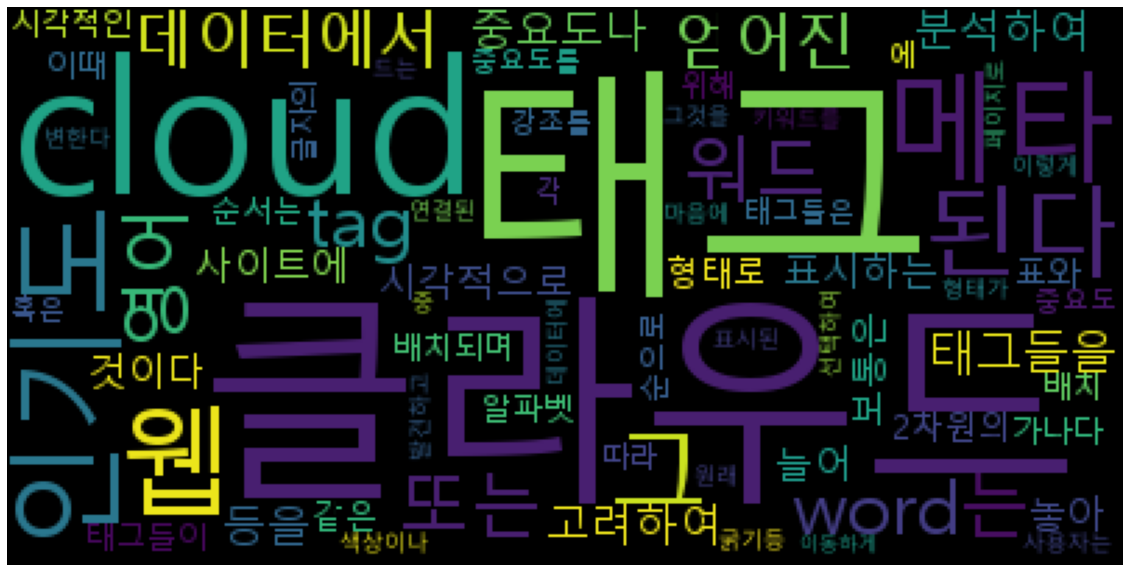

In [15]:
# Set figure size
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

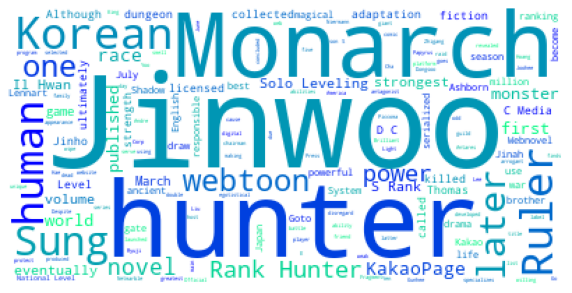

In [31]:
wiki = wikipedia.search('원피스')
wiki = wikipedia.page(wiki[0])
text = wiki.content

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', colormap='winter', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 뉴스기사 크롤링하여 워드클라우드 뿌리기

In [32]:
import os, re
import urllib.request as ur
from bs4 import BeautifulSoup as bs

In [86]:
url = "https://news.naver.com/main/list.naver?mode=LSD&mid=sec&sid1=001"

In [87]:
soup = bs(ur.urlopen(url).read(), 'html.parser')

In [88]:
soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="언론사별 속보 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/list.naver?mode=LSD&amp;mid=sec&amp;sid=001" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="언론사별 속보 뉴스를 제공합니다." property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="언론사별 속보 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="twitter:image"/>
<me

In [95]:
news = []
# news_li = soup.select('div.hdline_article_tit > a')
news_li = soup.select('ul.type06_headline > li > dl > dt > a')

for i in news_li:
    news.append(i.text.strip())

news

[]

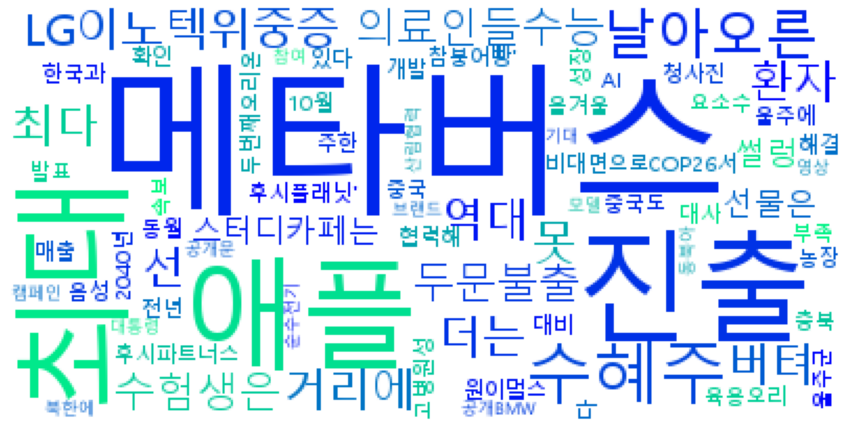

In [91]:
news_str = "".join(news)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', colormap='winter', font_path='font/malgun.ttf').generate(news_str)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [96]:
news2 = []
for page in range(1, 3):
    url = "https://news.naver.com/main/list.naver?mode=LSD&mid=sec&sid1=%d" %page
    soup = bs(ur.urlopen(url).read(), 'html.parser')
    
    # news_li = soup.select('div.hdline_article_tit > a')
    news_li2 = soup.select('ul.type06_headline > li > dl > dt > a')

    for i in news_li2:
        news2.append(i.text.strip())

news2

[]